## Project #3:

* Student name: Milena Afeworki
* Student pace: full time
* Scheduled project review date/time: 07/09/2021 @ 10:15 PT
* Instructor name: Abhineet Kulkarni 
* Blog post URL:


# Tanzanian Water Well Functionality Classification

Tanzania, as a developing country, struggles with providing clean water to its population of over 57,000,000. There are many waterpoints already established in the country, but some are in need of repair while others have failed altogether.
Using data from Taarifa and the Tanzanian Ministry of Water, we need to predict which pumps are functional, which need some repairs, and which don't work at all. A smart understanding of which waterpoints will fail can improve maintenance operations and ensure that clean, potable water is available to communities across Tanzania.

## The Business Problem

This project aims to use the data to anticipate when a well needs repair or maintenance, ideally before it breaks and disrupts the local water supply. Failing to identify nonfunctional water supply lines could lead villagers to suffer in many ways, including traveling long distances to other water sources resulting in increased time and effort to fetch water, and being exposed to different health-related issues that come with poor water quality. Accordingly, though it is important to build a model that will accurately classify the wells, it is crucial that our model's tolerance to errors of misclassifying wells, especially the 'nonfunctional' and 'needs repair' groups, is as low as possible.  




## Data Understanding

- **amount_tsh** - Total static head (amount water available to waterpoint)
- **date_recorded** - The date the row was entered
- **funder** - Who funded the well
- **gps_height** - Altitude of the well
- **installer** - Organization that installed the well
- **longitude** - GPS coordinate
- **latitude** - GPS coordinate
- **wpt_name** - Name of the waterpoint if there is one
- **num_private** -
- **basin** - Geographic water basin
- **subvillage** - Geographic location
- **region** - Geographic location
- **region_code** - Geographic location (coded)
- **district_code** - Geographic location (coded)
- **lga** - Geographic location
- **ward** - Geographic location
- **population** - Population around the well
- **public_meeting** - True/False
- **recorded_by** - Group entering this row of data
- **scheme_management** - Who operates the waterpoint
- **scheme_name** - Who operates the waterpoint
- **permit** - If the waterpoint is permitted
- **construction_year** - Year the waterpoint was constructed
- **extraction_type** - The kind of extraction the waterpoint uses
- **extraction_type_group** - The kind of extraction the waterpoint uses
- **extraction_type_class** - The kind of extraction the waterpoint uses
- **management** - How the waterpoint is managed
- **management_group** - How the waterpoint is managed
- **payment** - What the water costs
- **payment_type** - What the water costs
- **water_quality** - The quality of the water
- **quality_group** - The quality of the water
- **quantity** - The quantity of water
- **quantity_group** - The quantity of water
- **source** - The source of the water
- **source_type** - The source of the water
- **source_class** - The source of the water
- **waterpoint_type** - The kind of waterpoint
- **waterpoint_type_group** - The kind of waterpoint

In [82]:
# import all the necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.metrics import confusion_matrix, classification_report
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
sns.set_style('darkgrid')

from sklearn.metrics import plot_confusion_matrix

from xgboost import XGBClassifier

## Obtain data

Let's first import the data and take a look at the info to see if we need to do some data cleaning.

In [2]:
# load data set 
df = pd.read_csv('training_set_values.csv')
df.head()

id  amount_tsh date_recorded        funder  gps_height     installer  \
0  69572      6000.0    2011-03-14         Roman        1390         Roman   
1   8776         0.0    2013-03-06       Grumeti        1399       GRUMETI   
2  34310        25.0    2013-02-25  Lottery Club         686  World vision   
3  67743         0.0    2013-01-28        Unicef         263        UNICEF   
4  19728         0.0    2011-07-13   Action In A           0       Artisan   

   longitude   latitude              wpt_name  num_private  ... payment_type  \
0  34.938093  -9.856322                  none            0  ...     annually   
1  34.698766  -2.147466              Zahanati            0  ...    never pay   
2  37.460664  -3.821329           Kwa Mahundi            0  ...   per bucket   
3  38.486161 -11.155298  Zahanati Ya Nanyumbu            0  ...    never pay   
4  31.130847  -1.825359               Shuleni            0  ...    never pay   

  water_quality quality_group      quantity  quantity_group  \
0          soft          good        enough          enough   
1          soft          good  insufficient    insufficient   
2          soft          good        enough          enough   
3          soft          good           dry             dry   
4          soft          good      seasonal        seasonal   

                 source           source_type  source_class  \
0                spring                spring   groundwater   
1  rainwater harvesting  rainwater harvesting       surface   
2                   dam                   dam       surface   
3           machine dbh              borehole   groundwater   
4  rainwater harvesting  rainwater harvesting       surface   

               waterpoint_type waterpoint_type_group  
0           communal standpipe    communal standpipe  
1           communal standpipe    communal standpipe  
2  communal standpipe multiple    communal standpipe  
3  communal standpipe multiple    communal standpipe  
4           communal standpipe    communal standpipe  

[5 rows x 40 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55765 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59400 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

In [4]:
# check for NaNs
df.isna().sum()

id                           0
amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

## Scrubbing the data
### Cleaning based on info
Key observations from here:

**1. Dealing with missing values:**
- funder  = 3635
- installer = 3655  
- subvillage  = 371
- public_meeting = 3334
- scheme_managment = 3877
- scheme_name = 28166
- permit = 3056

**2. Dealing with date_recorded data type.**

**3. Dealing with outliers.**

### Dealing with the missing values.

**Funder**

In [5]:
df.funder.value_counts(normalize=True)

Government Of Tanzania          0.162898
Danida                          0.055841
Hesawa                          0.039487
Rwssp                           0.024639
World Bank                      0.024191
                                  ...   
Bumabu                          0.000018
Shirika La Kinamama Na Watot    0.000018
Abdala                          0.000018
Stephano                        0.000018
Kokornel                        0.000018
Name: funder, Length: 1897, dtype: float64

In [6]:
# Replace NaNs in 'funder' by 'other'
df['funder'] = df['funder'].replace(np.nan, 'other')

In [7]:
df.drop(columns=['scheme_name', 'subvillage', 'public_meeting',
                 'num_private', 'permit'], axis=1, inplace = True)

**Scheme managment**

In [8]:
df.scheme_management.value_counts()

VWC                 36793
WUG                  5206
Water authority      3153
WUA                  2883
Water Board          2748
Parastatal           1680
Private operator     1063
Company              1061
Other                 766
SWC                    97
Trust                  72
None                    1
Name: scheme_management, dtype: int64

In [9]:
# Replace NaNs in 'scheme_managment' by 'other'
df['scheme_management'] = df['scheme_management'].replace(np.nan,'other')

We might need this feature as it might give a better glance at which organization is responsible for the managment of a water well project scheme.

**Installer**

In [10]:
# Replace NaNs in 'installer' by 'other'
df['installer'] = df['installer'].replace(np.nan,'other')

### Dealing with date_recorded 

Tanzania has a rainy/wet season from December to May and a dry season from July to October. But as seen from the data not all the wells recieve their water source from rainfall so the season may not be of importance to us. Also the date recorded doesn't really signify age of the well so we are going to drop it all together.

In [11]:
df.drop(columns=['date_recorded'], axis=1, inplace = True)

### Dealing with outliers

Lets take a look at the location of those wells on the map and explore for any misplaced data or anything that looks weird.

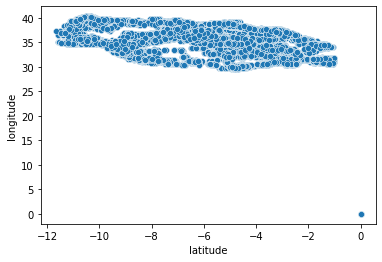

In [12]:
sns.scatterplot('latitude', 'longitude', data=df);

Looking at the scatter plot of the locational coordinates, we notice an outlier with a 0' 0' latitude and longitude which really doesn't make sense since these points are far off Tanzania. In this next step lets see how many of our data have these coordinates and drop them accordingly.

In [13]:
test = df.loc[df['longitude']==0, 'latitude'].value_counts()
test

-2.000000e-08    1812
Name: latitude, dtype: int64

In [14]:
to_drop = df.loc[(df['longitude']==0) & (df['latitude'] == -2.000000e-08)]
to_drop.shape

(1812, 34)

In [15]:
df.drop(to_drop.index, axis=0, inplace=True)

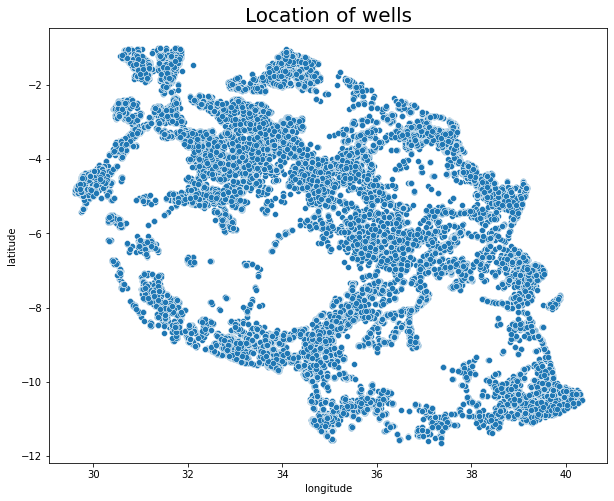

In [16]:
#plot longitude and latitude of Tanzania
fig = plt.figure(figsize=(10,8))
sns.scatterplot('longitude', 'latitude',  data=df)
plt.title('Location of wells', fontsize=20);

Now this looks much better. Check one last time to see if we have any missing values.

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57588 entries, 0 to 59399
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     57588 non-null  int64  
 1   amount_tsh             57588 non-null  float64
 2   funder                 57588 non-null  object 
 3   gps_height             57588 non-null  int64  
 4   installer              57588 non-null  object 
 5   longitude              57588 non-null  float64
 6   latitude               57588 non-null  float64
 7   wpt_name               57588 non-null  object 
 8   basin                  57588 non-null  object 
 9   region                 57588 non-null  object 
 10  region_code            57588 non-null  int64  
 11  district_code          57588 non-null  int64  
 12  lga                    57588 non-null  object 
 13  ward                   57588 non-null  object 
 14  population             57588 non-null  int64  
 15  re

## Explore

Now that our data is clean we will move on to the next step and merge the two tables to their corresponding ids inorder to label them according to their functionality.

### Merging Labels to the well ids

In [18]:
# Read csv file
df1 = pd.read_csv('training_set_labels.csv')
df1.head()

id    status_group
0  69572      functional
1   8776      functional
2  34310      functional
3  67743  non functional
4  19728      functional

In [19]:
# merge the two tables
df2 = pd.merge(df, df1, how = 'inner', left_on = ['id'], right_on = ['id'])
df2.shape

(57588, 35)

In [20]:
df2.status_group.value_counts()

functional                 31389
non functional             22268
functional needs repair     3931
Name: status_group, dtype: int64

### Visualization of features in relation to functionality

Text(0, 0.5, 'Number of wells')

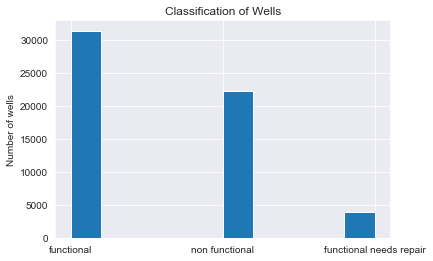

In [117]:
#plot number of wells according to functionality
plt.hist('status_group', data=df2);
plt.title('Classification of Wells')
plt.ylabel('Number of wells')

In [22]:
df2.status_group.value_counts(normalize=True)

functional                 0.545061
non functional             0.386678
functional needs repair    0.068261
Name: status_group, dtype: float64

We do see a class inbalance in the status group with 54.5% functional, 38.67% non functional,  6.82% functional needs repair.

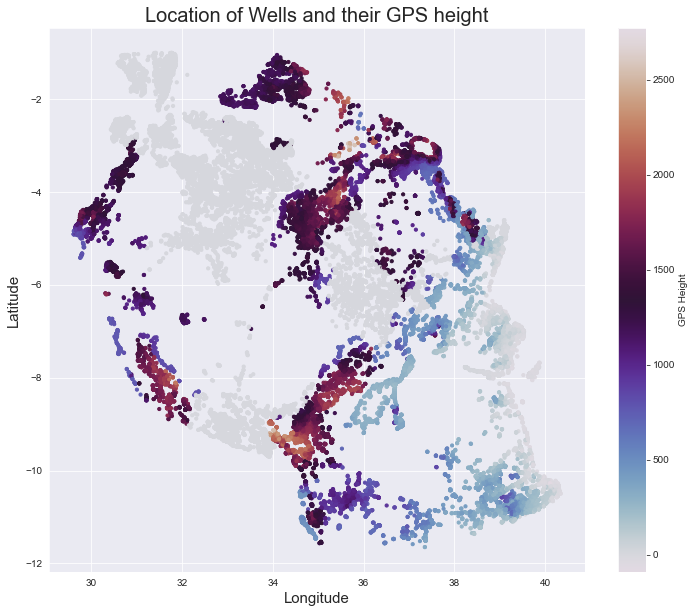

In [97]:
# plot wells on map with respect to water point height
plt.figure(figsize=(12,10))

plt.scatter(x='longitude', y='latitude', c='gps_height' , data=df2, s=10, cmap='twilight')
plt.colorbar().set_label('GPS Height')
plt.xlabel('Longitude', fontsize=15)
plt.ylabel('Latitude', fontsize=15)
plt.title('Location of Wells and their GPS height', fontsize=20)

plt.show()


Expectedly, wells will low GPS height of their water point seem to be clustered around 'non functional' or 'functional needs repair' classes. We will take a look at those in the actual map below and try to see the relationship.

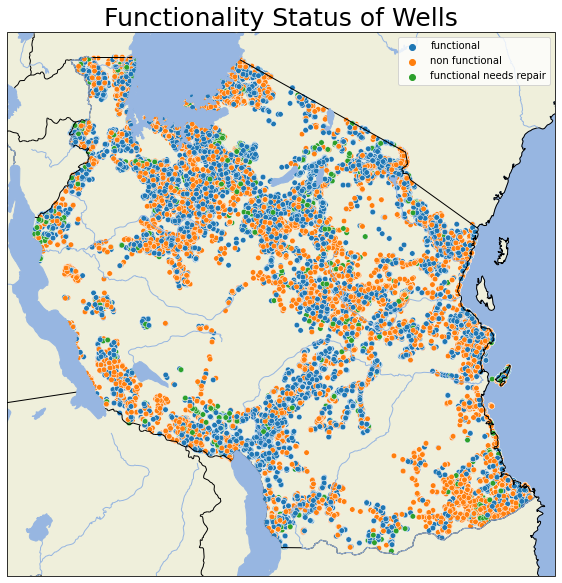

In [24]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature


plt.figure(figsize=(14,10))

# Creates the map
ca_map = plt.axes(projection=ccrs.PlateCarree())

ca_map.add_feature(cfeature.LAND)
ca_map.add_feature(cfeature.OCEAN)
ca_map.add_feature(cfeature.COASTLINE)
ca_map.add_feature(cfeature.BORDERS, linestyle='-')
ca_map.add_feature(cfeature.LAKES)
ca_map.add_feature(cfeature.RIVERS, linestyle='-' )
# ca_map.add_feature(cfeature.STATES.with_scale('10m'))


# Plots the data onto map
sns.scatterplot(df2['longitude'], df2['latitude'], 
            s=30,
            hue=df2['status_group'],
            transform=ccrs.PlateCarree())

# Plot labels
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)
plt.title('Functionality Status of Wells', fontsize=25)
plt.legend()
plt.show()


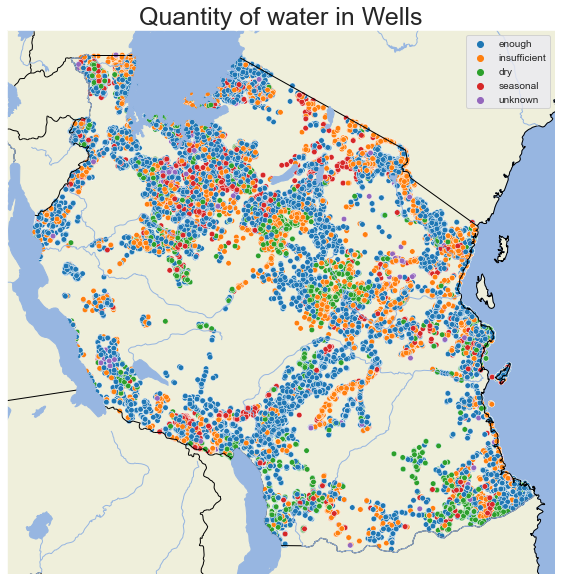

In [104]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature


plt.figure(figsize=(14,10))

# Creates the map
ca_map = plt.axes(projection=ccrs.PlateCarree())

ca_map.add_feature(cfeature.LAND)
ca_map.add_feature(cfeature.OCEAN)
ca_map.add_feature(cfeature.COASTLINE)
ca_map.add_feature(cfeature.BORDERS, linestyle='-')
ca_map.add_feature(cfeature.LAKES)
ca_map.add_feature(cfeature.RIVERS)
# ca_map.add_feature(cfeature.STATES.with_scale('10m'))


# Plots the data onto map
sns.scatterplot(df2['longitude'], df2['latitude'], 
            s=30,
            hue=df2['quantity'],
            transform=ccrs.PlateCarree())

# Plot labels
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)
plt.title('Quantity of water in Wells', fontsize=25)
plt.legend()
plt.show()


In [26]:
df.amount_tsh.value_counts(normalize=True)

0.0         0.691585
500.0       0.053865
50.0        0.042926
1000.0      0.025839
20.0        0.025405
              ...   
8500.0      0.000017
6300.0      0.000017
220.0       0.000017
138000.0    0.000017
12.0        0.000017
Name: amount_tsh, Length: 98, dtype: float64

Majority of the wells (69%) have a total static head of 0, which could signify that they are dry. Since this data was recorded at a specific date though, this could mean that those wells are non functional or possibly seasonal and happened to be dry at the time of inspection.

In [115]:
payment = df2.groupby('status_group')['payment_type'].value_counts(normalize = True).unstack()

Text(0, 0.5, 'Percentage')

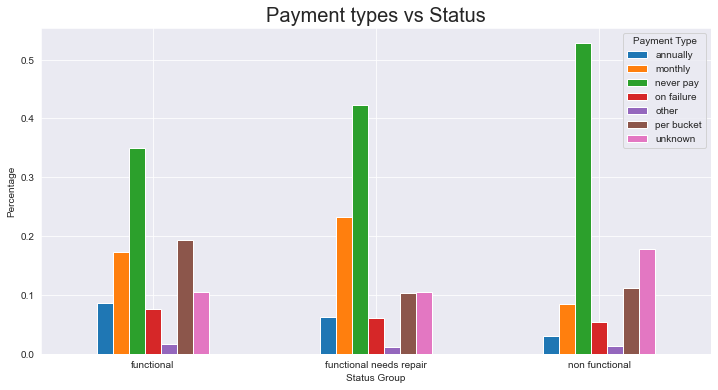

In [116]:
payment.plot.bar(figsize = (12, 6))
plt.xticks(rotation = 0)
plt.title('Payment types vs Status', fontsize=20)
plt.legend(title = 'Payment Type')
plt.xlabel('Status Group')
plt.ylabel('Percentage')

Let's keep plotting visualizations of different features with respect to status group of wells to understand the trend of the functionality of the those wells

In [118]:
quantity_df = df2.groupby('quantity')['status_group'].value_counts().unstack()

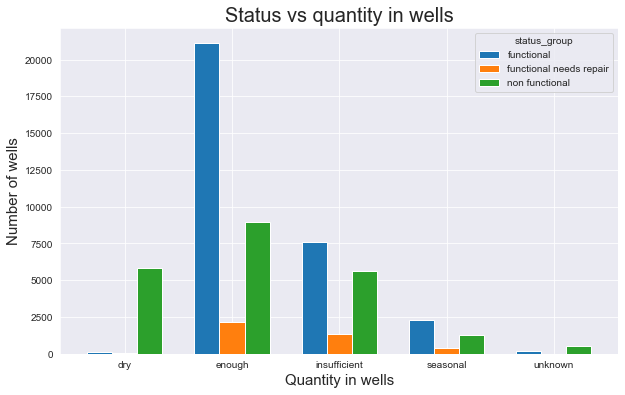

In [119]:
quantity_df.plot.bar(figsize = (10, 6), width=0.7)
plt.title('Status vs quantity in wells', fontsize=20)
plt.xlabel('Quantity in wells', fontsize=15)
plt.ylabel('Number of wells', fontsize=15)
plt.xticks(rotation = 0);

In [125]:
df2.quantity.value_counts(normalize=True)

enough          0.560186
insufficient    0.252900
dry             0.104015
seasonal        0.069476
unknown         0.013423
Name: quantity, dtype: float64

In [84]:
quantity_df = df2.groupby('water_quality')['status_group'].value_counts().unstack()

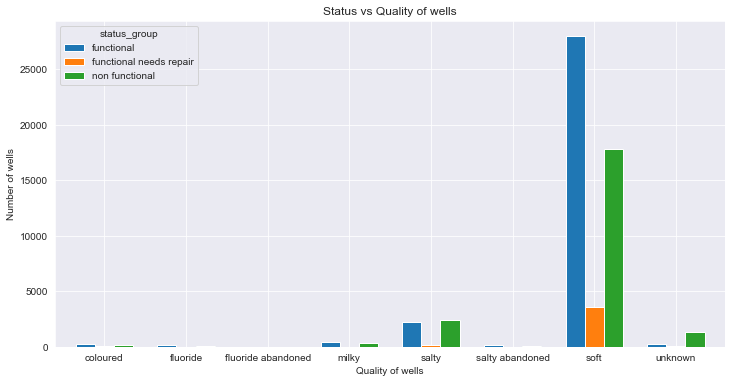

In [85]:
quantity_df.plot.bar(figsize = (12, 6), width=0.7)
plt.title('Status vs Quality of wells')
plt.xlabel('Quality of wells')
plt.ylabel('Number of wells')
plt.xticks(rotation = 0);

In [126]:
quantity_df = df2.groupby('extraction_type_class')['status_group'].value_counts().unstack()

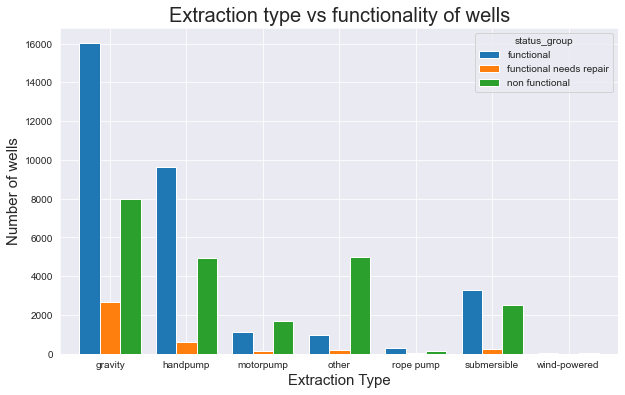

In [127]:
quantity_df.plot.bar(figsize = (10, 6), width=0.8)

plt.title('Extraction type vs functionality of wells', fontsize=(20))
plt.xlabel('Extraction Type', fontsize=15)
plt.ylabel('Number of wells', fontsize=15)
plt.xticks(rotation = 0);

Text(0.5, 0, 'Number of wells')

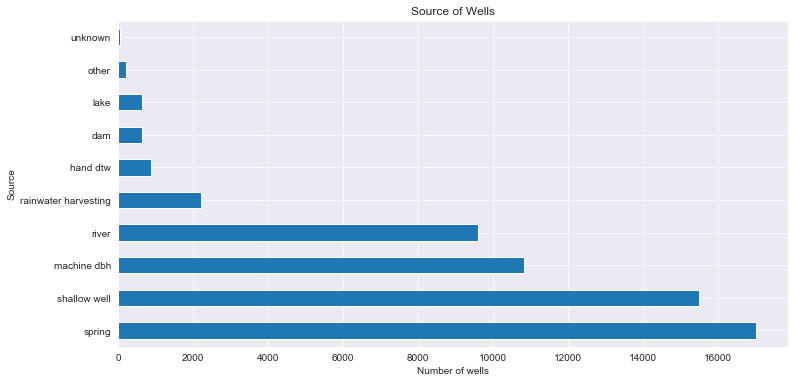

In [128]:
df2.source.value_counts().plot.barh(figsize = (12, 6))
plt.title('Source of Wells')
plt.ylabel('Source')
plt.xlabel('Number of wells')

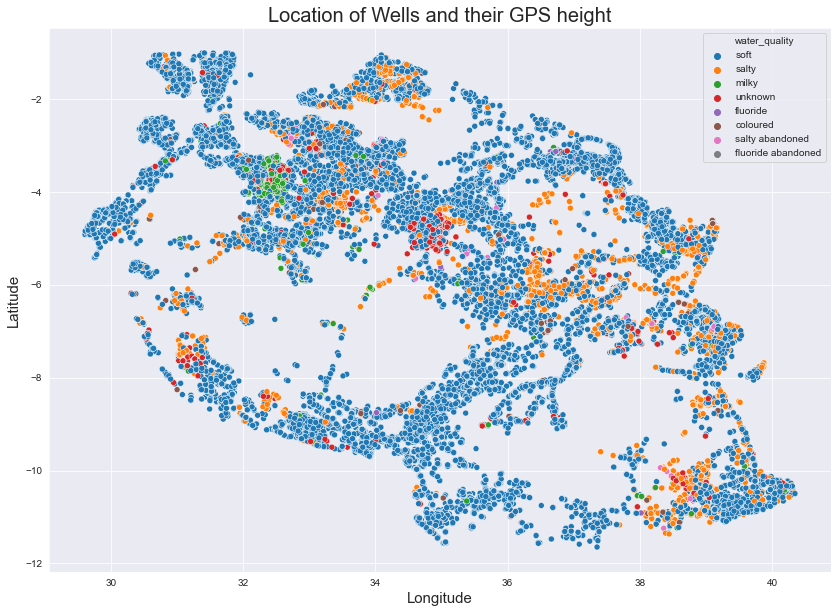

In [81]:
plt.figure(figsize=(14,10))
sns.scatterplot(x='longitude', y='latitude', hue='water_quality' , data=df2)

plt.xlabel('Longitude', fontsize=15)
plt.ylabel('Latitude', fontsize=15)
plt.title('Location of Wells and their GPS height', fontsize=20)

plt.show()


### Construction year

Construction year is an important feature for our modeling but we do have a large range of years which will be a huge number of columns when creating dummies. We will categorize the years in such a way that they will be parts of a 10 year time period to reduce the classes of this feature. Another point worth mentioning is that more than 30% of our data has no record of the construction year. Since this is an important feature and losing that much amount of data is not worth the risk we will take the option of replacing those values with random choice from the rest of the data.

In [37]:
df2.construction_year.value_counts(normalize=True)

0       0.328141
2010    0.045930
2008    0.045374
2009    0.043985
2000    0.036310
2007    0.027558
2006    0.025544
2003    0.022331
2011    0.021810
2004    0.019501
2012    0.018823
2002    0.018667
1978    0.018007
1995    0.017608
2005    0.017556
1999    0.017000
1998    0.016774
1990    0.016566
1985    0.016410
1980    0.014083
1996    0.014083
1984    0.013527
1982    0.012919
1994    0.012815
1972    0.012294
1974    0.011739
1997    0.011183
1992    0.011113
1993    0.010558
2001    0.009377
1988    0.009047
1983    0.008474
1975    0.007588
1986    0.007536
1976    0.007189
1970    0.007137
1991    0.005626
1989    0.005487
1987    0.005244
1981    0.004133
1977    0.003508
1979    0.003334
1973    0.003195
2013    0.003056
1971    0.002518
1960    0.001771
1967    0.001528
1963    0.001476
1968    0.001337
1969    0.001025
1964    0.000695
1962    0.000521
1961    0.000365
1965    0.000330
1966    0.000295
Name: construction_year, dtype: float64

In [38]:
df2['construction_year'] = df2['construction_year'].replace(0, np.nan)

In [39]:
#replace missing values with random choice
s = df2.construction_year.value_counts(normalize=True)
df2['const_year'] = df2['construction_year']
df2.loc[df2.construction_year.isna(), 'const_year'] = np.random.choice(s.index, p=s.values, size=df2.construction_year.isna().sum())

In [40]:
df2['const_year'].value_counts(normalize = True)

2008.0    0.068243
2010.0    0.067653
2009.0    0.066021
2000.0    0.053292
2007.0    0.041484
2006.0    0.039123
2003.0    0.033479
2011.0    0.032350
2004.0    0.028999
2002.0    0.027662
2012.0    0.027627
1978.0    0.026881
2005.0    0.025960
1995.0    0.025735
1999.0    0.025248
1990.0    0.025023
1985.0    0.024467
1998.0    0.024311
1996.0    0.021307
1980.0    0.020890
1984.0    0.020022
1982.0    0.019518
1994.0    0.019049
1972.0    0.018615
1974.0    0.017261
1992.0    0.016757
1997.0    0.016427
1993.0    0.015524
2001.0    0.014361
1988.0    0.013770
1983.0    0.012746
1986.0    0.011061
1975.0    0.010940
1970.0    0.010714
1976.0    0.010645
1989.0    0.008144
1991.0    0.008092
1987.0    0.007762
1981.0    0.006338
1977.0    0.004897
1973.0    0.004827
1979.0    0.004810
2013.0    0.004463
1971.0    0.003560
1960.0    0.002570
1967.0    0.002431
1963.0    0.002188
1968.0    0.001997
1969.0    0.001545
1964.0    0.000990
1962.0    0.000764
1961.0    0.000573
1965.0    0.

In [41]:
df2.drop('construction_year', axis=1, inplace=True)

Now that we will have replaced the missing values, next step would be to create bins for the years. The typical life expectancy of a water well is supposedly 65-100 years, and the life expectency of a water well pump is 10-15 years. We will bin the construction year column in such a way and then take a look at the visualizations.

In [42]:
norm = df2.const_year.value_counts()

In [43]:
norm = df2.groupby('const_year')['status_group'].value_counts().unstack()

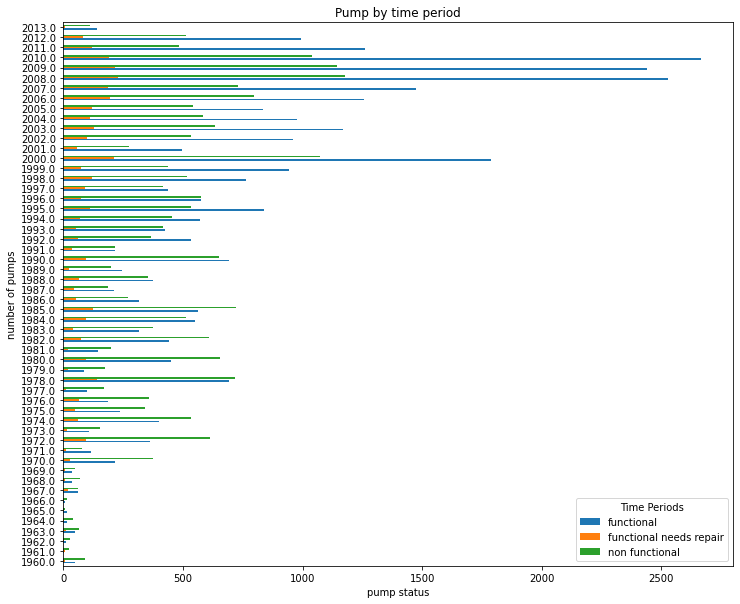

In [44]:

norm.plot.barh(figsize = (12, 10))
plt.title('Pump by time period')
plt.xlabel('pump status')
plt.ylabel('number of pumps')
plt.xticks(rotation = 0)
plt.legend(title = 'Time Periods')

In [45]:
bins = [1960, 1970, 1980, 1990, 2000, 2010, 2015]
periods = ['1960-1969', '1970-1979', '1980-1989', '1990-1999', '2000-2009', '2010-2015']

df2['construction_periods'] = pd.cut(df2['const_year'], bins ,
                                         labels = periods, right = False)

In [46]:
df2.head()

id  amount_tsh        funder  gps_height     installer  longitude  \
0  69572      6000.0         Roman        1390         Roman  34.938093   
1   8776         0.0       Grumeti        1399       GRUMETI  34.698766   
2  34310        25.0  Lottery Club         686  World vision  37.460664   
3  67743         0.0        Unicef         263        UNICEF  38.486161   
4  19728         0.0   Action In A           0       Artisan  31.130847   

    latitude              wpt_name                    basin   region  ...  \
0  -9.856322                  none               Lake Nyasa   Iringa  ...   
1  -2.147466              Zahanati            Lake Victoria     Mara  ...   
2  -3.821329           Kwa Mahundi                  Pangani  Manyara  ...   
3 -11.155298  Zahanati Ya Nanyumbu  Ruvuma / Southern Coast   Mtwara  ...   
4  -1.825359               Shuleni            Lake Victoria   Kagera  ...   

       quantity  quantity_group                source           source_type  \
0        enough          enough                spring                spring   
1  insufficient    insufficient  rainwater harvesting  rainwater harvesting   
2        enough          enough                   dam                   dam   
3           dry             dry           machine dbh              borehole   
4      seasonal        seasonal  rainwater harvesting  rainwater harvesting   

   source_class              waterpoint_type waterpoint_type_group  \
0   groundwater           communal standpipe    communal standpipe   
1       surface           communal standpipe    communal standpipe   
2       surface  communal standpipe multiple    communal standpipe   
3   groundwater  communal standpipe multiple    communal standpipe   
4       surface           communal standpipe    communal standpipe   

     status_group const_year construction_periods  
0      functional     1999.0            1990-1999  
1      functional     2010.0            2010-2015  
2      functional     2009.0            2000-2009  
3  non functional     1986.0            1980-1989  
4      functional     1990.0            1990-1999  

[5 rows x 36 columns]

In [47]:
df2.construction_periods.value_counts()

2000-2009    22956
1990-1999    11372
1980-1989     8334
2010-2015     7607
1970-1979     6516
1960-1969      803
Name: construction_periods, dtype: int64

In [48]:

time_periods = df2.groupby('status_group')['construction_periods'].value_counts().unstack()
time_periods.head()


construction_periods     1960-1969  1970-1979  1980-1989  1990-1999  \
status_group                                                          
functional                     288       2503       3619       6003   
functional needs repair         65        499        630        784   
non functional                 450       3514       4085       4585   

construction_periods     2000-2009  2010-2015  
status_group                                   
functional                   13917       5059  
functional needs repair       1553        400  
non functional                7486       2148

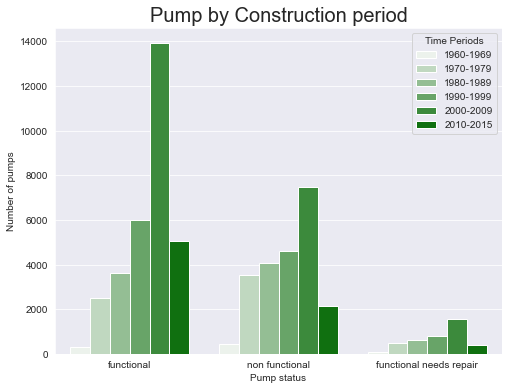

In [88]:
sns.set_style('darkgrid')
plt.figure(figsize=(8,6))
sns.countplot(data=df2, x='status_group', hue='construction_periods', color='Green')

plt.title('Pump by Construction period', fontsize=20)
plt.xlabel('Pump status')
plt.ylabel('Number of pumps')
plt.xticks(rotation = 0)
plt.legend(title = 'Time Periods')

In [ ]:
df2.population.value_counts(normalize=True)

The population column has more than 33% of its data to be 0 values and 12% of only 1 value. This information doesn't seem correct at all, better drop that feature. Some of the features are repetetive so we will just use the one with the most data and drop all the other similar features.

In [ ]:
df2.drop(columns=['wpt_name', 'recorded_by', 'lga', 'ward',
                  'extraction_type', 'extraction_type_group', 'population', 
                  'management', 'payment_type', 'water_quality', 'source',
                  'source_class', 'waterpoint_type', 'quantity_group',
                  'region_code', 'const_year', 'district_code'], axis=1, inplace=True)

In [ ]:
df2.shape

In [ ]:
# Replace target values - there are three classes
df2 = df2.replace({'status_group': {'functional' : 1, 
                                'non functional' : 0, 
                                'functional needs repair' : 2}})
# Check to see that it worked
df2.iloc[15:20]

### Creating Dummies

In [ ]:
target = ['status_group']

categorical = ['funder', 'installer', 'basin', 'region',
               'scheme_management', 'extraction_type_class', 'management_group', 'payment',
               'quality_group', 'quantity', 'source_type', 'waterpoint_type_group',
               'construction_periods']


continuous = ['amount_tsh', 'gps_height', 'longitude', 'latitude']

In [ ]:
# print number of classes in each category
for col in categorical:
    print(col, df2[col].value_counts().count())

In [ ]:
categories_to_remove = {}
for col in categorical:
    df_tmp = pd.DataFrame(df2[col].value_counts(normalize=True))
    other_categories = list(df_tmp.loc[df_tmp[col]<0.01].index)
    df2[col] = df2[col].map(lambda x: 'other' if x in other_categories else x)
    categories_to_remove[col] = other_categories

In [ ]:
# checking if our features of less than 1% are replaced
for col in categorical:
    print(df2[col].value_counts(normalize=True), '\n', df2[col].value_counts(normalize=True).count(), '\n')

In [ ]:
df2.drop(target , axis=1).columns

In [ ]:
df_dummies = pd.get_dummies(df2.drop(target, axis=1))
df_dummies.head().sort_values(by='id')

In [ ]:
df_dummies.shape

The next step would be to concatinate the Target features with the dummies.

In [ ]:
df_dummies['status_group'] = df2['status_group'].values

In [ ]:
df_dummies.shape

## Modeling


Here, we will run some Models using the classification algorithms of KNN, Random Forest and XGBoost. First we will run baseline models in each method and then move on to tunning and optimizing those models to increase performance and metric scores. I will use F1-score as my deciding metric, but precision and recall will let us know what values we're having trouble classifying, and where I can improve.

In [ ]:
# assign variables for features and target 
X = df_dummies.drop('status_group', axis = 1)
y = df_dummies['status_group']

In [ ]:
# split into test and train data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [ ]:
len(y_test)

In [ ]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

models = []
def get_metrics(y_test, X_test, model):
    labels = y_test.to_numpy()
    preds = model.predict(X_test)
    
    metrics = {}
    metrics['accuracy'] = accuracy_score(labels, preds)
    metrics['f1'] = f1_score(labels, preds, average='macro')
    metrics['precision'] = precision_score(labels, preds, average='macro')
    metrics['recall'] = recall_score(labels, preds, average='macro')
    
    return metrics


## KNN 

The KNN model is simple to fit, but time-consuming to predict on, especially on this large dataset. It also has relatively few hyperparameters to tune, so it may not improve much.

### Baseline Model

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train);

metrics = get_metrics(y_test, X_test, knn)
metrics['name'] = 'K Nearest Neighbors'
models.append(metrics)

In [ ]:
print(classification_report(y_train, knn.predict(X_train), 
                            target_names=['nonfunctional', 'functional', 
                                          'needs repair']))

In [ ]:
print(confusion_matrix(y_test, knn.predict(X_test)))
print(classification_report(y_test, knn.predict(X_test)))

### Confusion matrix

In [ ]:
plt.figure(figsize=(6,5))
plot_confusion_matrix(knn, X_test, y_test, 
                      display_labels=['nonfunctional', 'functional',
                                      'needs repair'], values_format='d', 
                                      cmap=plt.cm.Blues)
plt.title('K Nearest Neighbors')
plt.tight_layout()

plt.show()

In this KNN our model was able to capture 47% of the non functional, 61% of the functional, and only 1% of the functional needs repair.

### Standardizing 

First scale the data. We scale the data after splitting the train and test data to avoid data leakage.

In [ ]:
# Import StandardScaler
from sklearn.preprocessing import StandardScaler 


# Instantiate StandardScaler
scaler = StandardScaler()

# Transform the training and test sets
scaled_data_train = scaler.fit_transform(X_train)
scaled_data_test = scaler.transform(X_test)

# Convert into a DataFrame
scaled_df_train = pd.DataFrame(scaled_data_train, columns=X.columns)
scaled_df_train.head()

Now that you've preprocessed the data it's time to train a KNN classifier and validate its accuracy.

In [ ]:
# Import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

# Instantiate KNeighborsClassifier
knn = KNeighborsClassifier()
# Fit the classifier
knn.fit(scaled_data_train, y_train);


# Predict on the test set

metrics = get_metrics(y_test, scaled_data_test, knn)
metrics['name'] = 'K Nearest Neighbors scaled'
models.append(metrics)

In [ ]:
models_df = pd.DataFrame(models)
models_df.sort_values(by='f1', ascending=False)

### Optimazing k-value

Let's first create a function to iterate over a range of K-values to find out the best value for the optimum f1-score. Then pass that value for the first round of the GridSearchCV and take note of the result. In the second round of the GridSearchCV, we will try and narrow down the values around the successful ones already found in the first pass.

### Grid search CV

In [ ]:
def find_best_k(X_train, y_train, X_test, y_test, min_k=1, max_k=25):
    best_k = 0
    best_score = 0.0
    for k in range(min_k, max_k+1, 2):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        preds = knn.predict(X_test)
        f1 = f1_score(y_test, preds, average='weighted')
        if f1 > best_score:
            best_k = k
            best_score = f1
    
    print("Best Value for k: {}".format(best_k))
    print("F1-Score: {}".format(best_score))    


In [ ]:
find_best_k(scaled_data_train, y_train, scaled_data_test, y_test)

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {
    'n_neighbors': [1, 5, 9], # default 5
    'weights': ['uniform', 'distance'], # default 'uniform'
    'leaf_size': [30, 40], # default 30
    'p': [1, 2] # default 2
}

grid_search = GridSearchCV(knn, param_grid, cv=3, scoring='f1_macro')
grid_search.fit(scaled_data_train, y_train)

In [ ]:
grid_search.best_params_

In [ ]:
knn_tuned = KNeighborsClassifier(n_neighbors=9, weights='distance', leaf_size=30, p=1)
knn_tuned.fit(scaled_data_train, y_train)
get_metrics(y_test, scaled_data_test, knn_tuned)
metrics['name'] = 'K Nearest Neighbors tuned'
models.append(metrics)

In [ ]:
print(classification_report(y_train, knn_tuned.predict(scaled_data_train),
                            target_names=['nonfunctional', 'functional', 
                                          'needs repair']))

In [ ]:
print(confusion_matrix(y_test, knn_tuned.predict(scaled_data_test)))
print(classification_report(y_test, knn_tuned.predict(scaled_data_test),
                            target_names=['nonfunctional', 'functional', 
                                          'needs repair']))

In [ ]:
# Second round of GridSearchCV selection of parameters
param_grid = {
    'n_neighbors': [8, 9, 10], # default 5
#     'leaf_size': [30] # default 30  
}
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=3, scoring='f1_macro')
grid_search.fit(scaled_data_train, y_train)

In [ ]:
grid_search.best_params_

Since we don't see any change in the parameters selection we are going to keep our first trial and proceed to the next step.

In [ ]:
print(confusion_matrix(y_test, knn_tuned.predict(scaled_data_test)))
print(classification_report(y_test, knn_tuned.predict(scaled_data_test),
                            target_names=['nonfunctional', 'functional', 
                                          'needs repair']))

### Confusion Matrix

In [ ]:
from sklearn.metrics import plot_confusion_matrix

In [ ]:
plot_confusion_matrix(knn_tuned, X_test, y_test, 
                      display_labels=['nonfunctional','functional','needs repair'],
                                       values_format='d', cmap=plt.cm.Blues)
plt.title('K Nearest Neighbors tuned')
plt.tight_layout()

plt.show()

From the confusion matrix we can conclude that using the Grid search CV tunning method our model was able to predict:

**Non functional**
- 120 True positives 
- (45+6) = 51 False positives
- (2300+75) = 2375 False negatives
- (3900+33+460+8) = 6947 True Negatives

**Functional**
- 3900 True positives
- (2300+460) = 2760 False positives
- (45+33) = 78 False negatives
- (120+75+6+8) = 209 True negatives

**Needs Repair**
- 8 True positives
- (75+33) = 108 False positive
- (460+6) = 466 False negative
- (120+2300+3900+45) = 6365 True Negative

Since we are more interested in less False positives especially for identifying the 'nonfunctional' and 'needs repair' wells, our KNN model seems to have done better than the baseline model. It still looks like it needs some more work done at correctly classifying the 'needs repair' class, but this could also be due to the fact that the classes 'nonfunctional' and 'needs repair' have more or less similar features affecting their functionality. 

We'll try another optimizing technique and see how well our KNN model would perform.

### Smote

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
# Previous original class distribution
print('Original class distribution: \n')
print(y.value_counts())
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_sample(scaled_data_train, y_train) 
# Preview synthetic sample class distribution
print('-----------------------------------------')
print('Synthetic sample class distribution: \n')
print(pd.Series(y_train_resampled).value_counts()) 

In [ ]:
knn_smote = KNeighborsClassifier(n_neighbors=9, weights='distance', leaf_size=30, p=1)
knn_smote.fit(X_train_resampled, y_train_resampled)
get_metrics(y_test, scaled_data_test, knn_smote)
metrics['name'] = 'K Nearest Neighbors smote'
models.append(metrics)

In [ ]:
print(classification_report(y_train_resampled, knn_smote.predict(X_train_resampled),
                            target_names=['nonfunctional', 'functional', 
                                          'needs repair']))

In [ ]:
print(confusion_matrix(y_test, knn_smote.predict(scaled_data_test)))
print(classification_report(y_test, knn_smote.predict(scaled_data_test),
                            target_names=['nonfunctional', 'functional', 
                                          'needs repair']))

### Confusion Matrix

In [ ]:
plot_confusion_matrix(knn_smote, scaled_data_test, y_test, 
                      display_labels=['nonfunctional','functional','needs repair'],
                      values_format='d', cmap=plt.cm.Blues)
                                      
                     
plt.title('K Nearest Neighbors smote')
plt.tight_layout()

plt.show()

In [ ]:
models_df = pd.DataFrame(models)
models_df.sort_values(by='f1', ascending=False)


The K Nearest Neighbors model performed better after hyperparameter tunning in regards to Accuracy(74%) and F1 score, but didn't improve significantly with smote. The F1 score of (75%, 80%, 38%) show that there is a class imbalance and hence its effect is visible. But generally KNN also takes in incredibly long time to run on this large dataset, making it impractical to tune further.
The model was generally able to capture the following percentiles of the actual wells.


**K Nearest Neighbor:** 

   1. Baseline model
    
    Non functional  (47%)     
    Functional      (61%)   
    Functional needs repair  (1%) 
    
    
   2. Gridsearch CV
    
    Non functional  (71%)     
    Functional      (84%)   
    Functional needs repair  (27%)
    
    
   3. SMOTE
    
    Non functional  (71%)     
    Functional      (76%)   
    Functional needs repair  (41%)

## Random forest

### Baseline Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(random_state=12)
forest.fit(X_train, y_train);

metrics = get_metrics(y_test, X_test, forest)
metrics['name'] = 'Random Forest'
models.append(metrics)

In [ ]:
print(classification_report(y_train, forest.predict(X_train),
                            target_names=['nonfunctional', 'functional', 
                                          'needs repair']))

In [ ]:
print(confusion_matrix(y_test, forest.predict(X_test)))
print(classification_report(y_test, forest.predict(X_test),
                            target_names=['nonfunctional', 'functional', 
                                          'needs repair']))

### Confusion matrix

In [ ]:
plot_confusion_matrix(forest, X_test, y_test, 
                     display_labels=['nonfunctional', 'functional',
                                     'needs repair'], values_format='d', 
                                      cmap=plt.cm.Blues)
plt.title('Random forest Baseline')
plt.tight_layout()

plt.show()

### Standardized

In [ ]:
# Instantiate RandomForestClassifier
forest = RandomForestClassifier()
# Fit the classifier
forest.fit(scaled_data_train, y_train);


# Predict on the test set
metrics = get_metrics(y_test, scaled_data_test, forest)
metrics['name'] = 'Random forest scaled'
models.append(metrics)


### GridSearch CV

In [ ]:
param_grid = {
    'n_estimators': [100, 200], # default 100 #boosting stages
    'max_depth': [30, 35, 40], # default None
    'max_features': [50, 60], # default 'auto': auto=sqrt(# of features)=11, None=# of features=122
#     'min_samples_split' : [20,30,40],
#     'min_samples_leaf'  : [5, 10, 15]
    # default 'auto': auto=sqrt(# of features)=11, None=# of features=122
}
forest = RandomForestClassifier()
grid_search = GridSearchCV(forest, param_grid, cv=3, scoring='f1_macro')
grid_search.fit(scaled_data_train, y_train)

In [ ]:
grid_search.best_params_

In [ ]:
forest_tuned = RandomForestClassifier(n_estimators=100, max_depth=40,
                                      max_features=50, min_samples_leaf=35, 
                                      min_samples_split=70)
forest_tuned.fit(scaled_data_train, y_train)
get_metrics(y_test, scaled_data_test, forest_tuned)
metrics['name'] = 'Random Forest tuned1'
models.append(metrics)

In [ ]:
print(confusion_matrix(y_test, forest_tuned.predict(scaled_data_test)))
print(classification_report(y_test, forest_tuned.predict(scaled_data_test),
                            target_names=['nonfunctional', 'functional', 
                                          'needs repair']))

In [ ]:
param_grid = {
    'n_estimators': [100, 150], # default 100
    'max_depth': [30, 40, 50], # default None
    'max_features': [50, 55, 65],
#     'min_samples_split' : 70,
#     'min_samples_leaf'  : 35 
# we assume 5 would be the min sample leaf and avoid further search    
}
forest = RandomForestClassifier()
grid_search = GridSearchCV(forest, param_grid, cv=3, scoring='f1_macro')
grid_search.fit(scaled_data_train, y_train)

In [ ]:
grid_search.best_params_

In [ ]:
forest_tuned = RandomForestClassifier(n_estimators=150, max_depth=40,
                                      max_features=50, min_samples_leaf=35, 
                                      min_samples_split=70)
forest_tuned.fit(scaled_data_train, y_train)
get_metrics(y_test, scaled_data_test, forest_tuned)
metrics['name'] = 'Random Forest tuned2'
models.append(metrics)

In [ ]:
print(confusion_matrix(y_test, forest_tuned.predict(scaled_data_test)))
print(classification_report(y_test, forest_tuned.predict(scaled_data_test),
                            target_names=['nonfunctional', 'functional', 
                                          'needs repair']))

### Confusion matrix

In [ ]:
plot_confusion_matrix(forest_tuned, scaled_data_test, y_test, 
                     display_labels=['nonfunctional', 'functional',
                                      'needs repair'], values_format='d', 
                      cmap=plt.cm.Blues)
plt.title('Random Forest Scaled')
plt.tight_layout()

plt.show()

### Smote

In [ ]:
forest_smote = RandomForestClassifier(n_estimators=150, max_depth=40,
                                      max_features=50, min_samples_leaf=35, 
                                      min_samples_split=70)
forest_smote.fit(X_train_resampled, y_train_resampled)
get_metrics(y_test, scaled_data_test, forest_smote)
metrics['name'] = 'Random Forest smote'
models.append(metrics)

In [ ]:
print(confusion_matrix(y_test, forest_smote.predict(scaled_data_test)))
print(classification_report(y_test, forest_smote.predict(scaled_data_test),
                            target_names=['nonfunctional', 'functional', 
                                          'needs repair']))

### Confusion matrix

In [ ]:
plot_confusion_matrix(forest_tuned, scaled_data_test, y_test, 
                      display_labels=['nonfunctional', 'functional',
                                      'needs repair'], values_format='d', 
                      cmap=plt.cm.Blues)
plt.title('Random Forest Scaled')
plt.tight_layout()

plt.show()

Our Random Forest model has been able to correctly classify 5,353 data sets out of 6,837 which is 78% of our total data.

In [ ]:
models_df = pd.DataFrame(models)
models_df.sort_values(by='f1', ascending=False)

# Feature importance

In [ ]:

features = X_train.shape[1]
plt.figure(figsize=(20,20))
plt.barh(range(features), forest_tuned.feature_importances_, align='center')
plt.yticks(np.arange(features), X_train.columns.values)
plt.xlabel('Feature importance')
plt.ylabel('Features')

## XGBoost

### Baseline Model

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Instantiate XGBClassifier and fit classifier
xgb = XGBClassifier(random_state=12)
xgb.fit(X_train, y_train);

metrics = get_metrics(y_test, X_test, xgb)
metrics['name'] = 'XG Boost'
models.append(metrics)

In [ ]:
print(classification_report(y_train, xgb.predict(X_train),
                            target_names=['nonfunctional', 'functional', 
                                          'needs repair']))

In [ ]:
print(confusion_matrix(y_test, xgb.predict(X_test)))
print(classification_report(y_test, xgb.predict(X_test),
                            target_names=['nonfunctional', 'functional', 
                                          'needs repair']))

### Confusion Matrix

In [ ]:
plot_confusion_matrix(xgb, X_test, y_test, 
                     display_labels=['nonfunctional', 'functional',
                                      'needs repair'], values_format='d', 
                      cmap=plt.cm.Blues)
plt.title('XGBoost')
plt.tight_layout()

plt.show()

### Standardized

In [ ]:
# Fit the classifier
xgb.fit(scaled_data_train, y_train);

# Predict on the test set
metrics = get_metrics(y_test, scaled_data_test, xgb)
metrics['name'] = 'XGBoost scaled'
models.append(metrics)

### Grid search CV

In [ ]:
param_grid = {
    'learning_rate': [0.05, 0.1],
    'max_depth': [6, 8, 10],
    'subsample': [0.5, 0.7],
    'n_estimators': [100, 150, 200],
}
xgb = XGBClassifier()
grid_search = GridSearchCV(xgb, param_grid, cv=None, scoring='f1_macro', n_jobs=1)
grid_search.fit(scaled_data_train, y_train)

In [ ]:
grid_search.best_params_

In [ ]:
# Instantiate XGBClassifier and fit classifier

xgb_tuned = XGBClassifier(n_estimators=200, learning_rate=0.1, max_depth=10,
                          subsample=0.7)
xgb_tuned.fit(scaled_data_train, y_train)
get_metrics(y_test, scaled_data_test, xgb_tuned)
metrics['name'] = 'XGBoost scaled'
models.append(metrics)

In [ ]:
print(classification_report(y_train, xgb_tuned.predict(scaled_data_train),
                            target_names=['nonfunctional', 'functional', 
                                          'needs repair']))

In [ ]:
print(confusion_matrix(y_test, xgb_tuned.predict(scaled_data_test)))
print(classification_report(y_test, xgb_tuned.predict(scaled_data_test),
                            target_names=['nonfunctional', 'functional', 
                                          'needs repair']))

In [ ]:
param_grid = {
    'learning_rate': [0.1, 0.2],
    'max_depth': [10,15,20],
    'subsample': [0.6, 0.7],
    'n_estimators': [200, 250],
}
xgb = XGBClassifier()
grid_search = GridSearchCV(xgb, param_grid, cv=None, scoring='f1_macro', n_jobs=1)
grid_search.fit(scaled_data_train, y_train)

In [ ]:
grid_search.best_params_

In [ ]:
# Instantiate XGBClassifier and fit classifier

xgb_tuned = XGBClassifier(n_estimators=100, learning_rate=0.2, max_depth=6,
                          min_child_weight=1, subsample=0.5)
xgb_tuned.fit(scaled_data_train, y_train)
get_metrics(y_test, scaled_data_test, xgb_tuned)
metrics['name'] = 'XGBoost scaled'
models.append(metrics)

In [ ]:
print(confusion_matrix(y_test, xgb_tuned.predict(scaled_data_test)))
print(classification_report(y_test, xgb_tuned.predict(scaled_data_test),
                            target_names=['nonfunctional', 'functional', 
                                          'needs repair']))

### Confusion matrix

In [ ]:
plot_confusion_matrix(xgb_tuned, scaled_data_test, y_test, 
                      display_labels=['nonfunctional', 'functional',
                                      'needs repair'], values_format='d', cmap=plt.cm.Blues)
plt.title('XGBoost tuned')
plt.tight_layout()

plt.show()

### Smote

In [ ]:
# Instantiate XGBClassifier and fit classifier
xgb_smote = XGBClassifier(n_estimators=500, max_depth=None, max_features='auto')
xgb_smote.fit(X_train_resampled, y_train_resampled)
get_metrics(y_test, scaled_data_test, forest_smote)
metrics['name'] = 'XGBoost smote'
models.append(metrics)

In [ ]:
print(confusion_matrix(y_test, xgb_smote.predict(scaled_data_test)))
print(classification_report(y_test, xgb_smote.predict(scaled_data_test),
                            target_names=['nonfunctional', 'functional', 
                                          'needs repair']))

### Confusion matrix

In [ ]:
plot_confusion_matrix(xgb_smote, scaled_data_test, y_test, 
                      display_labels=['functional', 'needs repair', 
                                      'nonfunctional'], cmap=plt.cm.Blues)
plt.title('XGBoost smote')
plt.tight_layout()

plt.show()

## Analysis

In [ ]:
models_df = pd.DataFrame(models)
models_df.sort_values(by='accuracy', ascending=False)

next things to do

DONE 1. labels of confusion matrix

DONE 2. join in all the base line models togetherr withe models

3.  run a best param for loop for the best parameters of each model method
3. study and understand the meaning of all the params and why we choose them 
4. study how to increase the f1 score
5. study how to interpret the confusion matrix since it is multi class

DONE 6. label and title all visualizations

7. WHY DID YOU CHOOSE THESE MODELING TECHNIQUES???
8. .be able to explain each step in the moedeling methods and optimazing techniques
9. don't forget to cite important websites
10. public meetings and functionality of wells



## Conclusion & Recommendation

The overall best model was Random Forrest which performed considerably better than other models at predicting which wells were functional but need repair.(Recall score)

**Random forest:** 

   1. Baseline model
    
    Non functional  (77%)     
    Functional      (87%)   
    Functional needs repair  (29%) 
    
    
   2. Gridsearch CV
    
    Non functional  (68%)     
    Functional      (92%)   
    Functional needs repair  (10%)
    
    
   3. SMOTE
    
    Non functional  (69%)     
    Functional      (79%)   
    Functional needs repair  (55%)

 Given more time and with some more tunning it may be able to increase its performance.

## Further Study

1. Identify and indicate wells that are no longer functional due to being past their life span.

2. Review which extraction types last longer in supply and quality of water.

3. Identify companies with a record of poor installation, and lack of maintenance.

4. Include date records of maintenance, accurate population size and Construction year.